<a href="https://colab.research.google.com/github/nooraovo/nooraovo.github.io/blob/main/Multi_neuron_exp1_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class TwoLayerNN(nn.Module):
  def __init__(self, m, d): # fix the second layer to be all 1
    super().__init__()
    self.fc1 = nn.Linear(d, m, bias=False)
    self.fc2 = torch.ones([m, 1])

  def activation(self, x): # cubic activation
    return (x.clamp(min=0))**3

  def forward(self, x):
    _output = self.activation(self.fc1(x))
    output = torch.matmul(_output, self.fc2)
    return output

In [24]:
n = 100
D_in = 20
D_out = 1
m = 8

def get_data(n, D_in): # set data to be y * w + noise
  x=torch.randn(n,D_in)
  torch.nn.init.normal_(x, 0, 1) # initialize x

  u=torch.rand(D_in,D_out)
  u=u/u.norm() # ||u||=1
  y=x.mm(u)
  y=y.clamp(min=0)
  y=y**3

  return x, y

In [25]:
x, y = get_data(n, D_in)
model =  TwoLayerNN(m, D_in)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=.9, weight_decay=0)
criteria = nn.MSELoss()

In [26]:
def weights_init(m):
  for p in m.parameters():
    nn.init.xavier_uniform_(p, gain=.1)

def train(epochs, lr):
  model =  TwoLayerNN(m, D_in)
  model.apply(weights_init)
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0, weight_decay=0)

  model.train()
  res = []
  for epoch in range(epochs):
    output = model(x)
    loss = criteria(output, y)

    optimizer.zero_grad()
    loss.backward()
    # nn.utils.clip_grad_norm_(model.parameters(), 5)

    optimizer.step()

    tmp = []
    for p in model.parameters():
      tmp += [(p.clone().detach()**2).sum(dim=-1).numpy()]

    res += [tmp]
    if epoch % 100 == 0:
      print (epoch, loss.item())

  return np.array(res)

In [56]:
lr_small = 0.00005
norm_small = train(50000, lr=lr_small)

0 10.406010627746582
100 10.403847694396973
200 10.401433944702148
300 10.398720741271973
400 10.395655632019043
500 10.392169952392578
600 10.388175964355469
700 10.383567810058594
800 10.378201484680176
900 10.371891975402832
1000 10.364394187927246
1100 10.355374336242676
1200 10.344376564025879
1300 10.3307466506958
1400 10.31356430053711
1500 10.29144287109375
1600 10.262277603149414
1700 10.222738265991211
1800 10.167340278625488
1900 10.08665657043457
2000 9.963631629943848
2100 9.765802383422852
2200 9.428767204284668
2300 8.82563591003418
2400 7.753847599029541
2500 6.182386875152588
2600 4.836740493774414
2700 4.189673900604248
2800 3.7715978622436523
2900 3.3502557277679443
3000 2.914107084274292
3100 2.4961013793945312
3200 2.128079414367676
3300 1.8231943845748901
3400 1.5790953636169434
3500 1.3880126476287842
3600 1.2405674457550049
3700 1.1264524459838867
3800 1.0360184907913208
3900 0.9617167711257935
4000 0.8983597755432129
4100 0.8426370024681091
4200 0.7924990057945

In [57]:
lr_large = 0.01
norm_large = train(10000, lr=lr_large)

0 10.42265510559082
100 0.4453641176223755
200 0.2888108193874359
300 0.1698845624923706
400 0.11298654228448868
500 0.08233784884214401
600 0.06282850354909897
700 0.049601998180150986
800 0.0404214970767498
900 0.03395232558250427
1000 0.029309604316949844
1100 0.025896474719047546
1200 0.02331624925136566
1300 0.021307323127985
1400 0.019695427268743515
1500 0.018369784578680992
1600 0.01725252903997898
1700 0.01629428006708622
1800 0.015458723530173302
1900 0.014718503691256046
2000 0.014056826941668987
2100 0.013460462912917137
2200 0.01291782595217228
2300 0.012418401427567005
2400 0.011959725990891457
2500 0.011534248478710651
2600 0.011138112284243107
2700 0.010768814943730831
2800 0.0104225417599082
2900 0.010095967911183834
3000 0.009788974188268185
3100 0.00949940551072359
3200 0.009225510060787201
3300 0.008965297602117062
3400 0.00871820654720068
3500 0.008484328165650368
3600 0.008259614929556847
3700 0.008048116229474545
3800 0.007846090942621231
3900 0.00765194138512015

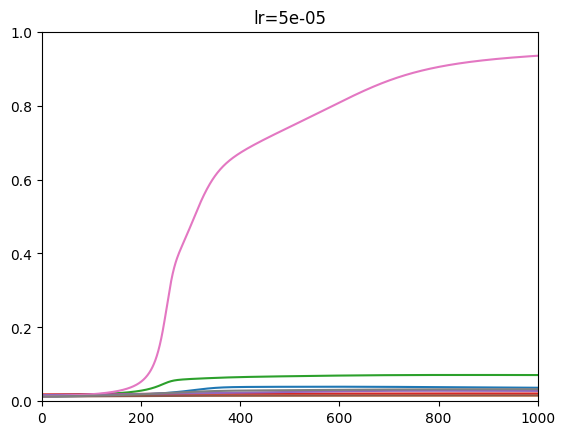

In [61]:
for i in range(m):
  plt.xlim(0, 1000)
  plt.ylim(0, 1)
  plt.plot(norm_small[::10, 0, i])
  plt.title('lr={0}'.format(lr_small))
  #plt.plot(log2[::10, 1, i])

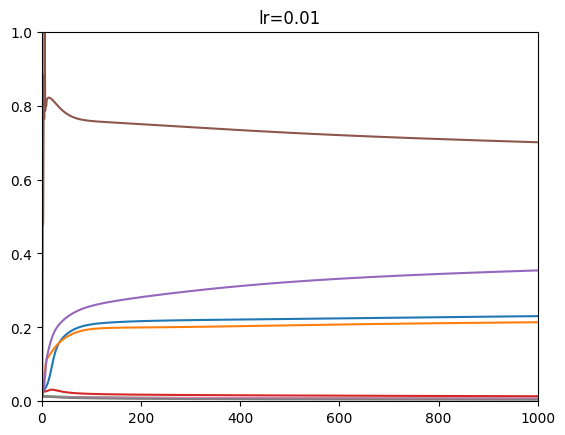

In [62]:
for i in range(m):
  plt.xlim(0, 1000)
  plt.ylim(0, 1)
  plt.plot(norm_large[::10, 0, i])
  plt.title('lr={0}'.format(lr_large))